(3, 1) (100, 3)


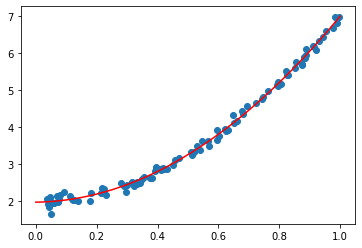

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.rand(100, 1)
y = 2.0+5*x*x+0.1*np.random.randn(100, 1)

# Y = a +b*x + c*x**2
X = np.zeros((len(x), 3))
X[:, 0] = 1
X[:, 1] = x[:, 0]
X[:, 2] = x[:, 0]**2

XT = np.transpose(X)

XTXinv = np.linalg.inv(np.matmul(XT, X))
XTy = np.matmul(XT, y)
beta = np.matmul(XTXinv, XTy)

print(np.shape(beta), np.shape(X))
# y_ = np.matmul(X, beta)

x_ = np.linspace(0, 1, 1000)
y_ = beta[0] + beta[1]*x_ + beta[2]*x_**2 

plt.scatter(x, y)
plt.plot(x_, y_, c="r")
plt.show()

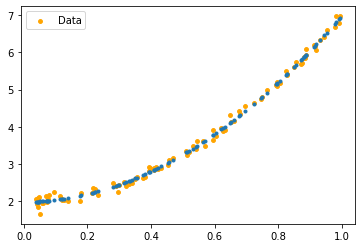

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


poly3 = PolynomialFeatures(degree=2)
X = poly3.fit_transform(x)
clf3 = LinearRegression()
clf3.fit(X, y)
y_ = clf3.predict(X)
#Xplot=poly3.fit_transform(x)

plt.scatter(x, y, label='Data', color='orange', s=15)
plt.plot(x, y_, ".")
plt.legend()
plt.show()

In [28]:
def MSE(y, y_):
    return 1/len(y)*np.sum((y-y_)**2)
print(MSE(y, y_))


def R2(y, y_):
    _y = 1/len(y)*np.sum(y)
    return 1 - np.sum((y-y_)**2)/np.sum((y-_y)**2)
print(R2(y, y_))

0.008528344440828523
0.9964777687842802
